In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd

#since our csv file data contains different encoding
encodings = ['utf-8','latin1', 'ISO-8859-1','cp1252']

file_path = 'spam[1].csv'
#Trying different encodings 
for encoding in encodings:
    try:
        df= pd.read_csv(file_path,encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break   #If successfull the loop stops
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue #To try next encoding

#If the loop excecutes without success, df will not be defined
if 'df' in locals():
    print("CSV file loading is successful.")
else:
    print("Attempts to encoding fails. Unable to read the CSV file.")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file loading is successful.


In [3]:
df.sample(8)


v1                                                 v2 Unnamed: 2  \
1107   ham  From someone not to smoke when every time I've...        NaN   
130    ham                                          I'm home.        NaN   
1723   ham  Hi Jon, Pete here, Ive bin 2 Spain recently & ...        NaN   
901    ham        How is it possible to teach you. And where.        NaN   
2268  spam                  88066 FROM 88066 LOST 3POUND HELP        NaN   
5326   ham                         What makes you most happy?        NaN   
136    ham                 He is there. You call and meet him        NaN   
2355   ham  Hello, my love ! How went your day ? Are you a...        NaN   

     Unnamed: 3 Unnamed: 4  
1107        NaN        NaN  
130         NaN        NaN  
1723        NaN        NaN  
901         NaN        NaN  
2268        NaN        NaN  
5326        NaN        NaN  
136         NaN        NaN  
2355        NaN        NaN

In [4]:
df.shape

(5572, 5)

In [5]:
# PROCESS:
        #DATA CLEANING
        #EDA
        #TEXT PREPROCESSING
        #MODEL BUILDING
        #EVALUATION
        #IMPROVEMENT
        #WEBSITE
        #DEPLOY

In [6]:
#DATA CLEANING

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#dropping unnamed columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

v1                                                 v2
2640   ham    Pandy joined 4w technologies today.he got job..
4012   ham                                                Ok.
3645   ham  Carlos says we can pick up from him later so y...
470   spam  okmail: Dear Dave this is your final notice to...
3134   ham  Wat makes some people dearer is not just de ha...

In [9]:
# Renaming columns for the easy understanding 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

target                                               text
799     ham        \Gimme a few\" was  &lt;#&gt;  minutes ago"
3885    ham  Same, I'm at my great aunts anniversary party ...
4673    ham                          I'm leaving my house now.
2217    ham  * Will have two more cartons off u and is very...
1458    ham  Fighting with the world is easy, u either win ...

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep ='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape
#Cleaning of dataset is done

(5169, 2)

In [18]:
#EXPLORATORY DATA ANALYSIS


df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [19]:
df['target'].value_counts()
#Dataset is imbalanced

target
0    4516
1     653
Name: count, dtype: int64

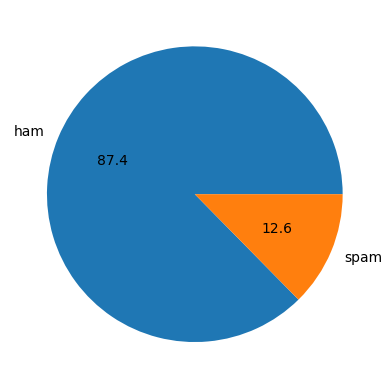

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct='%0.1f')
plt.show()

In [21]:
import nltk

In [22]:
!pip install nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\S Praveen
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#Number of characters
df['num_of_characters'] = df['text'].apply(len)

In [25]:
df.head()

target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

   num_of_characters  
0                111  
1                 29  
2                155  
3                 49  
4                 61

In [26]:
#Number of words
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

   num_of_characters  num_of_words  
0                111            24  
1                 29             8  
2                155            37  
3                 49            13  
4                 61            15

In [28]:
#Number of sentences
df['num_of_sentence'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

   num_of_characters  num_of_words  num_of_sentence  
0                111            24               24  
1                 29             8                8  
2                155            37               37  
3                 49            13               13  
4                 61            15               15

In [30]:
df[['num_of_characters','num_of_words','num_of_sentence']].describe()

num_of_characters  num_of_words  num_of_sentence
count        5169.000000   5169.000000      5169.000000
mean           78.977945     18.455794        18.455794
std            58.236293     13.324758        13.324758
min             2.000000      1.000000         1.000000
25%            36.000000      9.000000         9.000000
50%            60.000000     15.000000        15.000000
75%           117.000000     26.000000        26.000000
max           910.000000    220.000000       220.000000

In [31]:
# Only ham
df[df['target']==0][['num_of_characters','num_of_words','num_of_sentence']].describe()

num_of_characters  num_of_words  num_of_sentence
count        4516.000000   4516.000000      4516.000000
mean           70.459256     17.123782        17.123782
std            56.358207     13.493970        13.493970
min             2.000000      1.000000         1.000000
25%            34.000000      8.000000         8.000000
50%            52.000000     13.000000        13.000000
75%            90.000000     22.000000        22.000000
max           910.000000    220.000000       220.000000

In [32]:
# only spam
df[df['target']==1][['num_of_characters','num_of_words','num_of_sentence']].describe()

num_of_characters  num_of_words  num_of_sentence
count         653.000000    653.000000       653.000000
mean          137.891271     27.667688        27.667688
std            30.137753      7.008418         7.008418
min            13.000000      2.000000         2.000000
25%           132.000000     25.000000        25.000000
50%           149.000000     29.000000        29.000000
75%           157.000000     32.000000        32.000000
max           224.000000     46.000000        46.000000

In [33]:
import seaborn as sns


C:\Users\S Praveen Kumar\anaconda.x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\S Praveen Kumar\anaconda.x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_characters', ylabel='Count'>

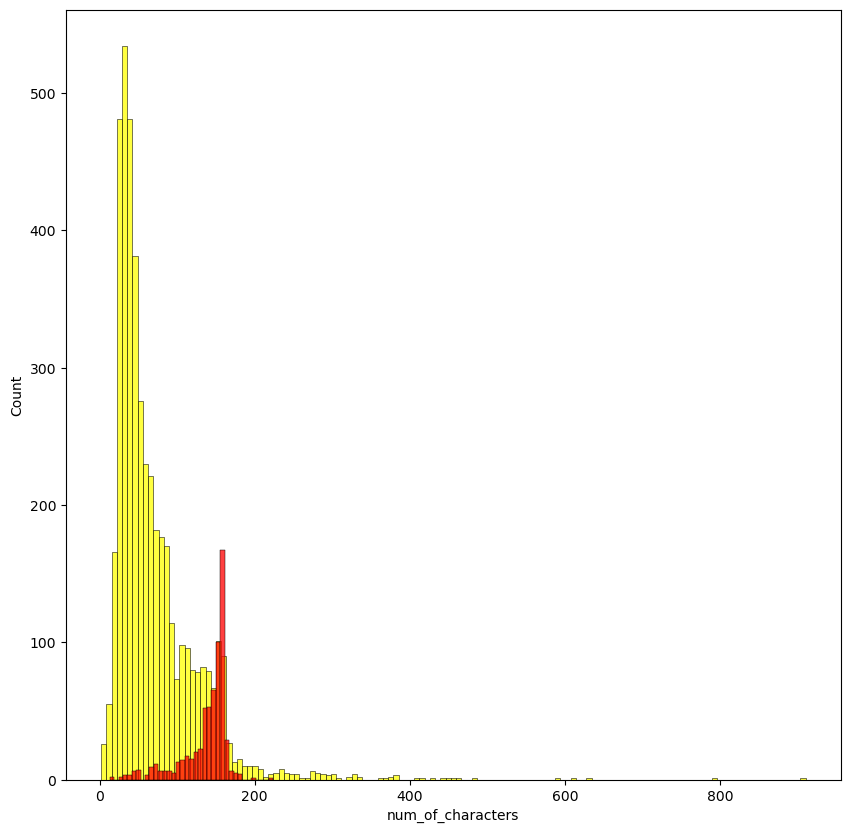

In [34]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['target'] == 0]['num_of_characters'],color='yellow')
sns.histplot(df[df['target'] == 1]['num_of_characters'],color='red')


C:\Users\S Praveen Kumar\anaconda.x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\S Praveen Kumar\anaconda.x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_words', ylabel='Count'>

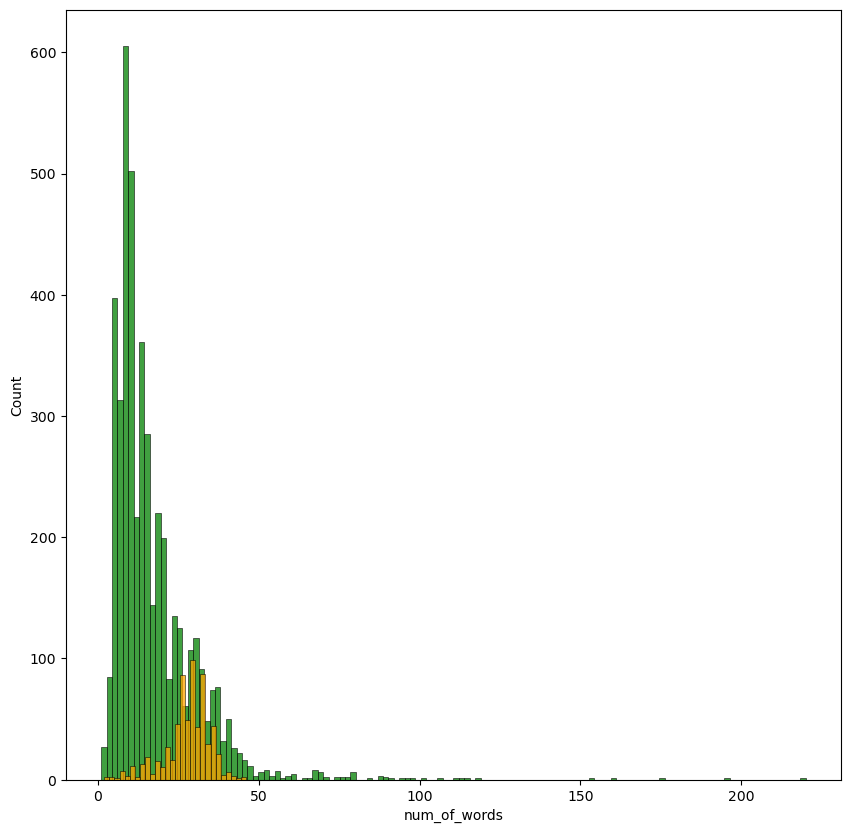

In [35]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['target'] == 0]['num_of_words'],color='green')
sns.histplot(df[df['target'] == 1]['num_of_words'],color='orange')

C:\Users\S Praveen Kumar\anaconda.x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\S Praveen Kumar\anaconda.x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_sentence', ylabel='Count'>

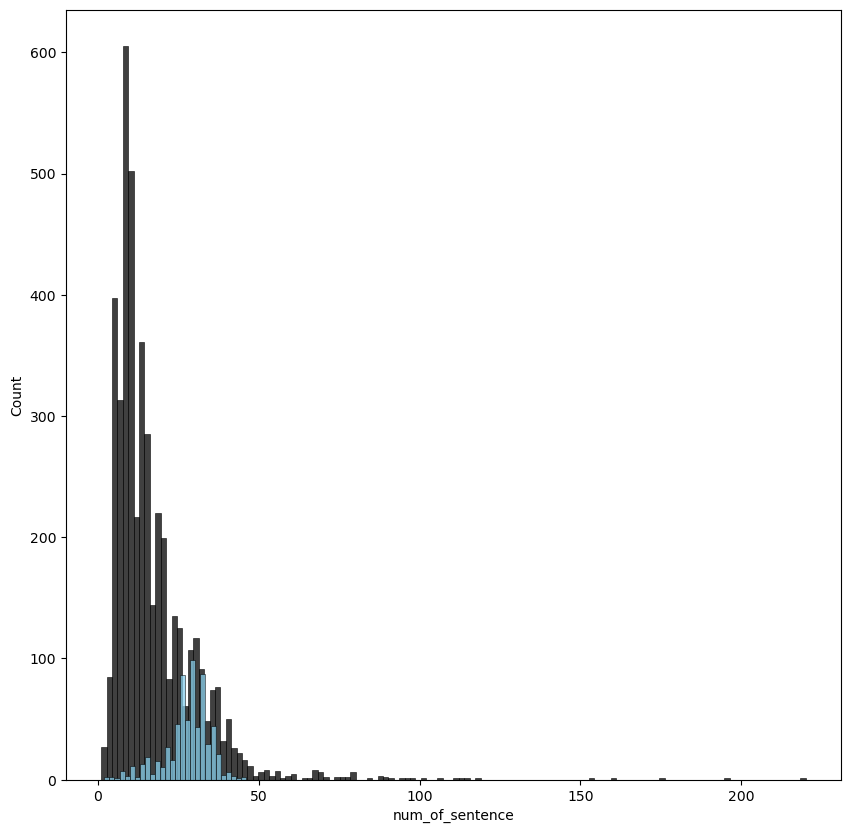

In [36]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['target'] == 0]['num_of_sentence'],color='black')
sns.histplot(df[df['target'] == 1]['num_of_sentence'],color='skyblue')

C:\Users\S Praveen Kumar\anaconda.x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\S Praveen Kumar\anaconda.x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\S Praveen Kumar\anaconda.x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


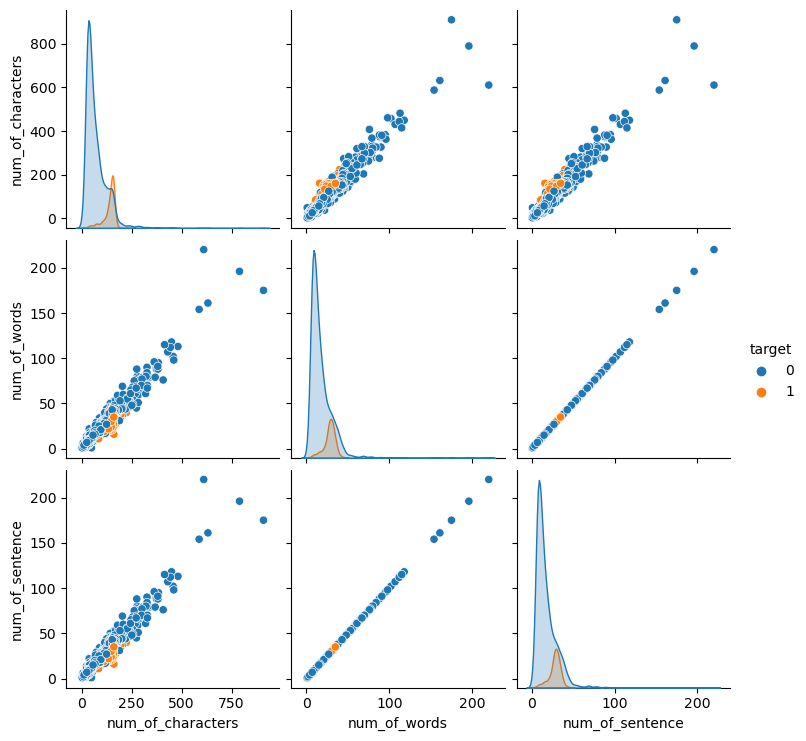

In [37]:
sns.pairplot(df,hue='target')

In [38]:
#DATA PREPROCESSING

#process:
        #Lower case
        #Tokenization
        #Removing special characters
        #Removing stop words and punctuation
        #stemming

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') #stopwords dataset download

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transformed_text = transform_text("'Is that seriously how you spell his name?'")
print(transformed_text)    

serious spell name


[nltk_data] Downloading package stopwords to C:\Users\S Praveen
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df['text'][20]

'Is that seriously how you spell his name?'

In [41]:
#Example
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('sleeping')

'sleep'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

   num_of_characters  num_of_words  num_of_sentence  \
0                111            24               24   
1                 29             8                8   
2                155            37               37   
3                 49            13               13   
4                 61            15               15   

                                    transformed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though

In [44]:
!pip install wordcloud

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width = 400, height = 400, min_font_size = 15, background_color = 'white')

In [46]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

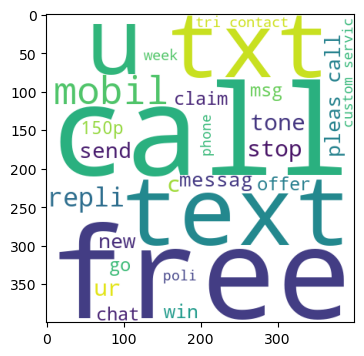

In [47]:
plt.figure(figsize = (15,4))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


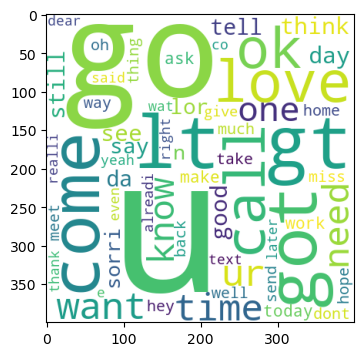

In [49]:
plt.figure(figsize = (15,4))
plt.imshow(ham_wc)

In [50]:
spam_cp = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_cp.append(word)

In [51]:
len(spam_cp)

9939

In [52]:
# Words list
# Text Vectorization

df.head()

target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

   num_of_characters  num_of_words  num_of_sentence  \
0                111            24               24   
1                 29             8                8   
2                155            37               37   
3                 49            13               13   
4                 61            15               15   

                                    transformed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though

In [53]:
!pip install scikit-learn

In [54]:
!pip install xgboost

In [55]:
#Building the model

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [57]:
x=tfidf.fit_transform(df['transformed_text']).toarray()


In [58]:
y=df['target'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' :svc,
    'KN' :knc,
    'NB': mnb, 
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gdbt,
    'xgb': xgb
}   

In [64]:
def train_classifier (clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [65]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [66]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    print("FOR ",name)
    print("ACCURACY ",current_accuracy)
    print("PRECISION ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

FOR  SVC
ACCURACY  0.9758220502901354
PRECISION  0.9747899159663865
FOR  KN
ACCURACY  0.9052224371373307
PRECISION  1.0
FOR  NB
ACCURACY  0.9709864603481625
PRECISION  1.0
FOR  DT
ACCURACY  0.9332688588007737
PRECISION  0.8415841584158416
FOR  LR
ACCURACY  0.9584139264990329
PRECISION  0.9702970297029703
FOR  RF
ACCURACY  0.9758220502901354
PRECISION  0.9829059829059829
FOR  AdaBoost
ACCURACY  0.960348162475822
PRECISION  0.9292035398230089
FOR  Bgc
ACCURACY  0.9584139264990329
PRECISION  0.8682170542635659
FOR  ETC
ACCURACY  0.9748549323017408
PRECISION  0.9745762711864406
FOR  GBDT
ACCURACY  0.9468085106382979
PRECISION  0.9191919191919192
FOR  xgb
ACCURACY  0.9671179883945842
PRECISION  0.9262295081967213


In [67]:
performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [69]:
performance

Algorithm  Accuracy  Precision
1         KN  0.905222   1.000000
2         NB  0.970986   1.000000
5         RF  0.975822   0.982906
0        SVC  0.975822   0.974790
8        ETC  0.974855   0.974576
4         LR  0.958414   0.970297
6   AdaBoost  0.960348   0.929204
10       xgb  0.967118   0.926230
9       GBDT  0.946809   0.919192
7        Bgc  0.958414   0.868217
3         DT  0.933269   0.841584

In [ ]:
#Improving model
#No of parameters are decreased to improve efficiency

In [70]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000')

In [72]:
new_df = performance.merge(temp_df,on = 'Algorithm')

In [73]:
new_df_scaled = new_df.merge(temp_df,on ='Algorithm')

In [74]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars')

In [75]:
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_max_ft_3000_x  \
0         KN  0.905222   1.000000                0.905222   
1         NB  0.970986   1.000000                0.970986   
2         RF  0.975822   0.982906                0.975822   
3        SVC  0.975822   0.974790                0.975822   
4        ETC  0.974855   0.974576                0.974855   
5         LR  0.958414   0.970297                0.958414   
6   AdaBoost  0.960348   0.929204                0.960348   
7        xgb  0.967118   0.926230                0.967118   
8       GBDT  0.946809   0.919192                0.946809   
9        Bgc  0.958414   0.868217                0.958414   
10        DT  0.933269   0.841584                0.933269   

    Precision_max_ft_3000_x  Accuracy_max_ft_3000_y  Precision_max_ft_3000_y  \
0                  1.000000                0.905222                 1.000000   
1                  1.000000                0.970986                 1.000000   
2                  0.982906                0.975822                 0.982906   
3                  0.974790                0.975822                 0.974790   
4                  0.974576                0.974855                 0.974576   
5                  0.970297                0.958414                 0.970297   
6                  0.929204                0.960348                 0.929204   
7                  0.926230                0.967118                 0.926230   
8                  0.919192                0.946809                 0.919192   
9                  0.868217                0.958414                 0.868217   
10                 0.841584                0.933269                 0.841584   

    Accuracy_num_chars  Precision_num_chars  
0             0.905222             1.000000  
1             0.970986             1.000000  
2             0.975822             0.982906  
3             0.975822             0.974790  
4             0.974855             0.974576  
5             0.958414             0.970297  
6             0.960348             0.929204  
7             0.967118             0.926230  
8             0.946809             0.919192  
9             0.958414             0.868217  
10            0.933269             0.841584

In [77]:
#Voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)

from sklearn.ensemble import VotingClassifier

In [78]:
vote = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting = 'soft')

In [80]:
vote.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [82]:
y_pred = vote.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [83]:
#Applying Stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [84]:
from sklearn.ensemble import StackingClassifier

In [85]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [86]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [87]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [100]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data with corresponding labels(replacing with the already existing data)
x_train = ["Sample text 1","Sample text 2","Sample text 3"]
y_train = [0,1,0] # 0-Negative 1-Positive

# To create and train the TFIDF vectorizer
tfidf = TfidfVectorizer(lowercase = True , stop_words  = 'english')
x_train_tfidf = tfidf.fit_transform(x_train)

# To create and train the Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(x_train_tfidf,y_train)

# Save the two models
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)
